# Verify CF correction

### Preliminaries, Loading Modules, Etc

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:

from __future__ import division

import bz2
import corner
import daft
import h5py

import scipy.integrate as si
import scipy.optimize as so
import scipy.stats as ss
import seaborn as sns


In [3]:
plt.rcParams['figure.figsize'] = [14.0, 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['figure.titlesize'] = 'medium'

In [4]:
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

## Run 4

In [113]:
#choose psi

def plot_run4(i):
    psi_values = [0,0.52359878, 1.0471976, 1.5707963, 2.0943951, 2.6179939]
    psi = psi_values[i]

    #load the theoretical curves
    name_string_th = 'Theoretical_Distance_Posterior_AA_run4/distance_v_0.00192190489027_psi{}corr.txt'.format(psi)
    posterior_distance_th = genfromtxt(name_string_th)

    #load the posterior samples, generated with lalinference
    name_string_lal = 'posterior_samples_AA_run4/posterior_samples_{}.dat'.format(i)
    postskyfixed = genfromtxt(name_string_lal, names=True)
    print( postskyfixed.dtype)


    dist_std = std(postskyfixed['distance'])
    sns.distplot(postskyfixed['distance'])
    xlabel(r'$d_L$ ($\mathrm{Mpc}$)')
    ylabel(r'$p\left( d_L \right)$ ($\mathrm{Mpc}^{-1}$)')
    legend(loc='best')
    print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['distance']),dist_std))
    plt.show()

    y, x, _ = plt.hist(postskyfixed['distance'], bins = 50, label = 'distance')
    mu = x[numpy.argmax(y/x[1:]**2)]
    print ('maximal distance (with prior) = {}'.format(x[numpy.argmax(y)]))
    print ('maximal likelihood distance = {}'.format(mu))
    plt.show()

    sns.distplot(postskyfixed['distance']/mu, label = 'Posterior samples with lalinference')
    plt.plot(posterior_distance_th[:,0], posterior_distance_th[:,1], label = 'Theoretical prediction')
    plt.title(r'Posterior samples vs. theoretical prediction for run4, point AA, edge-on with $\psi=${:.3g}'.format(psi))
    plt.xlim(1-5*dist_std/mu,1+5*dist_std/mu)
    xlabel(r'$d_L/d_{L,0}$ ')
    ylabel(r'$p\left( d_L/d_{L,0} \right)$')
    legend(loc='best')
    plt.savefig('Figures/run4_AA/'+'distance_v_0.00192190489027_psi{}corr.png'.format(psi), dpi = 200)
    print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['distance']),std(postskyfixed['distance'])))

[('theta2', '<f8'), ('logw', '<f8'), ('theta_jn', '<f8'), ('costheta_jn', '<f8'), ('redshift', '<f8'), ('v1_end_time', '<f8'), ('v1_optimal_snr', '<f8'), ('f_ref', '<f8'), ('psdscaleflag', '<f8'), ('phi_jl', '<f8'), ('l1_optimal_snr', '<f8'), ('mtotal', '<f8'), ('signalmodelflag', '<f8'), ('phi2', '<f8'), ('logl', '<f8'), ('phi1', '<f8'), ('costilt1', '<f8'), ('deltalogll1', '<f8'), ('h1_cplx_snr_arg', '<f8'), ('deltaloglh1', '<f8'), ('eta', '<f8'), ('v1h1_delay', '<f8'), ('mc_source', '<f8'), ('deltalogl', '<f8'), ('h1_cplx_snr_amp', '<f8'), ('l1v1_delay', '<f8'), ('mf_source', '<f8'), ('l1h1_delay', '<f8'), ('declination', '<f8'), ('m1', '<f8'), ('ra', '<f8'), ('h1l1_relative_phase', '<f8'), ('m2', '<f8'), ('tilt2', '<f8'), ('lal_pnorder', '<f8'), ('costilt2', '<f8'), ('iota', '<f8'), ('m2_source', '<f8'), ('rightascension', '<f8'), ('v1l1_delay', '<f8'), ('mtotal_source', '<f8'), ('psi', '<f8'), ('cosiota', '<f8'), ('l1_end_time', '<f8'), ('h1v1_relative_phase', '<f8'), ('phi12', '<

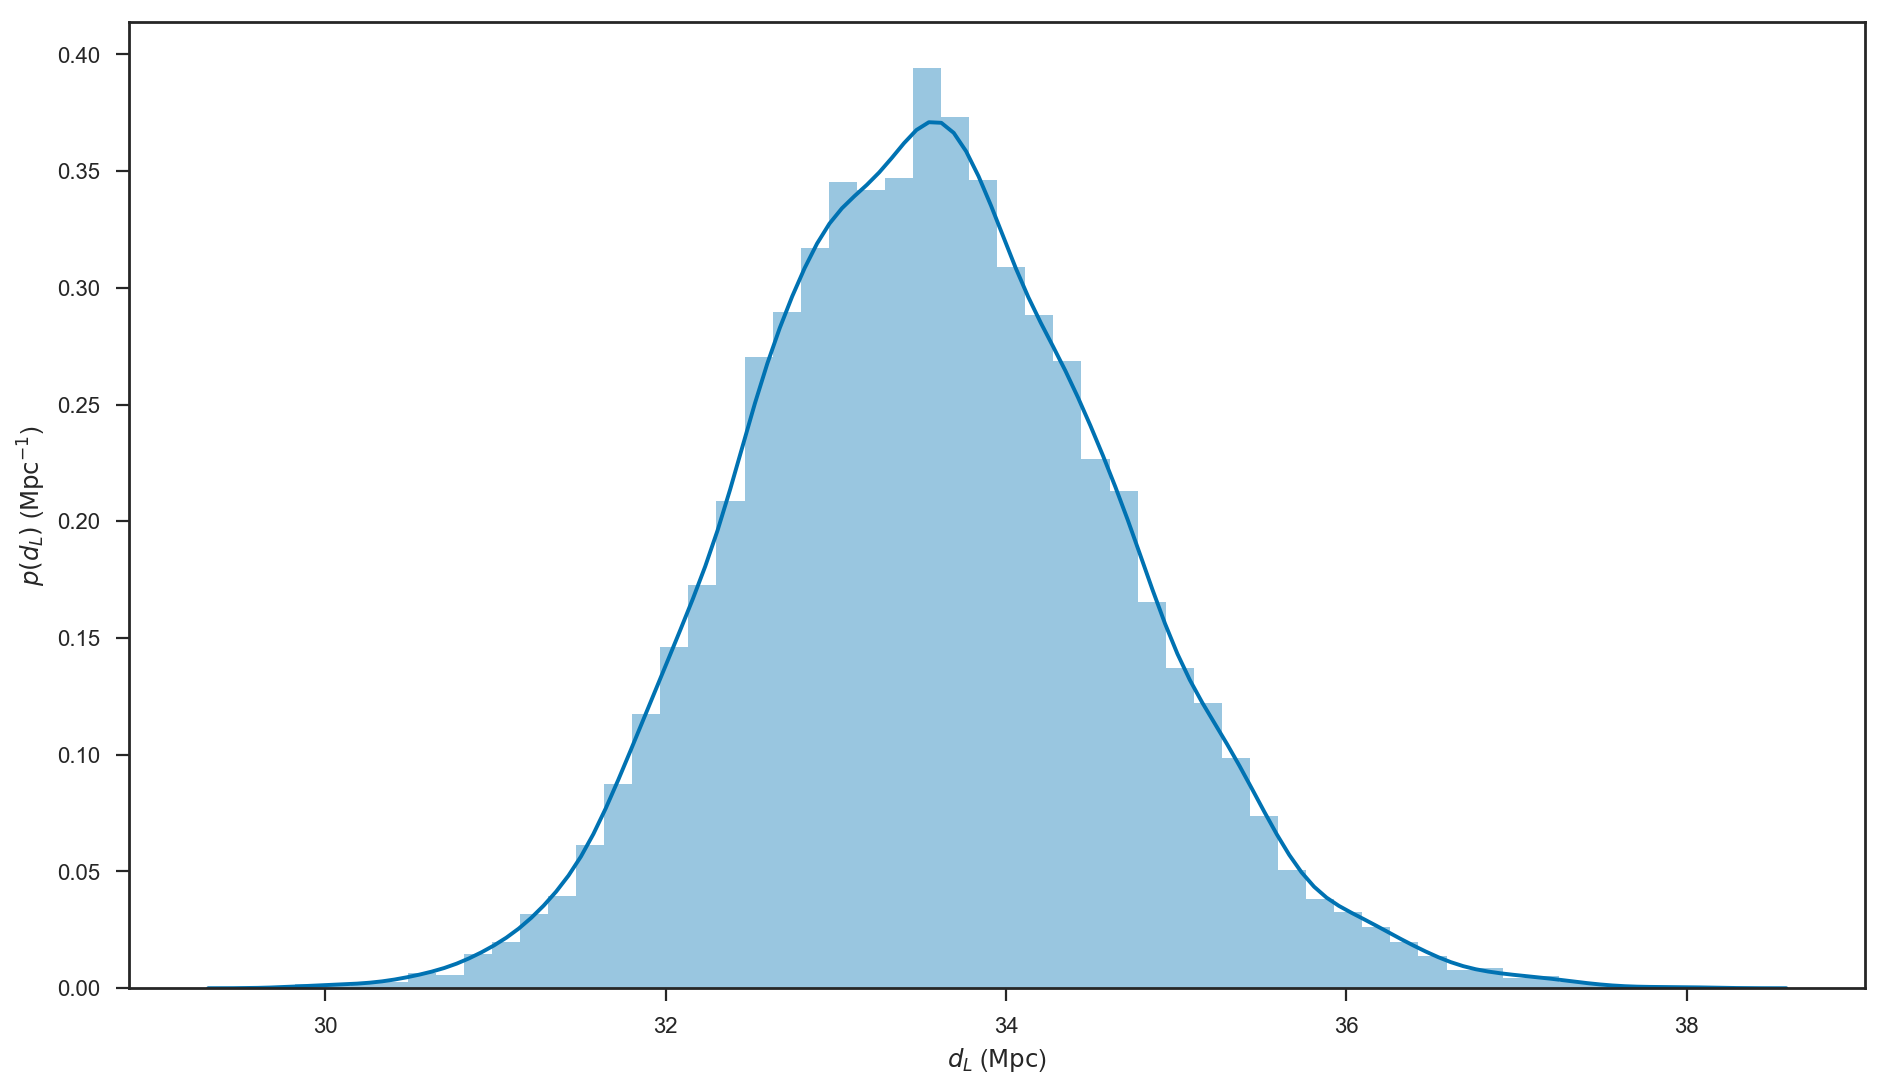

maximal distance (with prior) = 33.45303228124661
maximal likelihood distance = 33.45303228124661


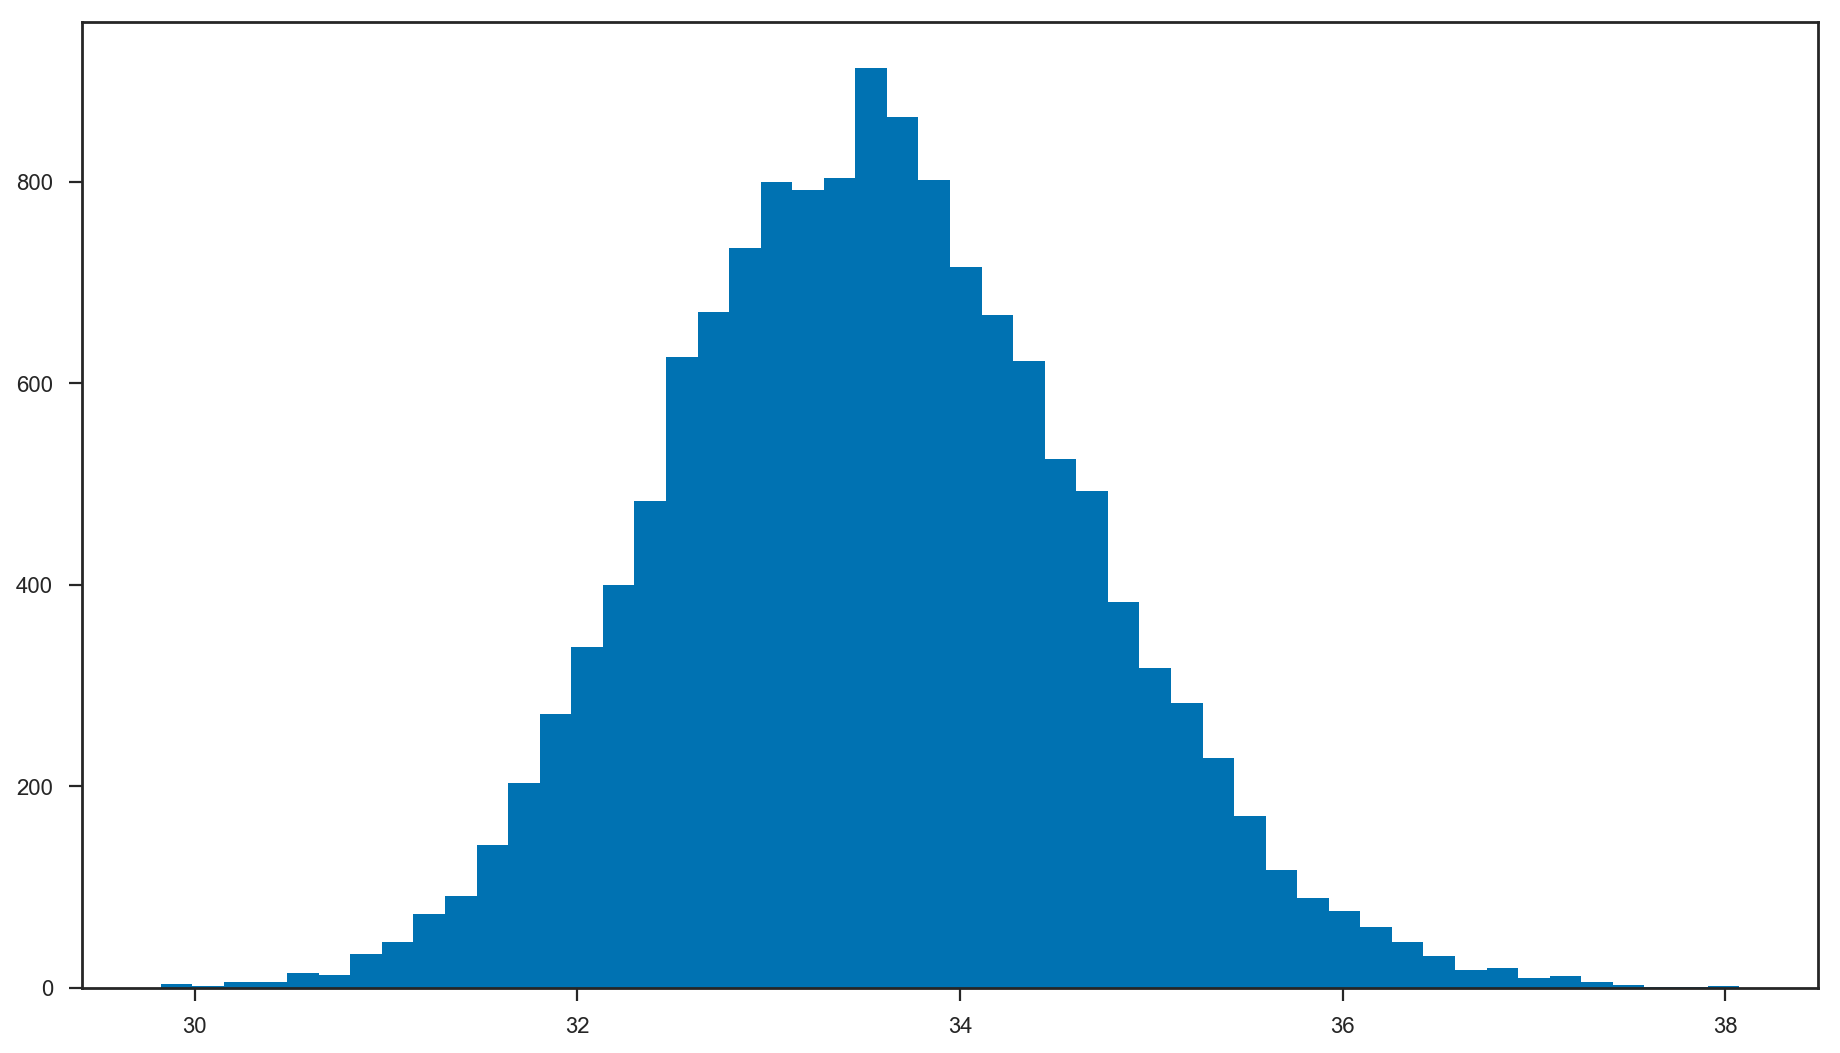

<d> +/- sigma_d = 33.57 +/- 1.1 Mpc


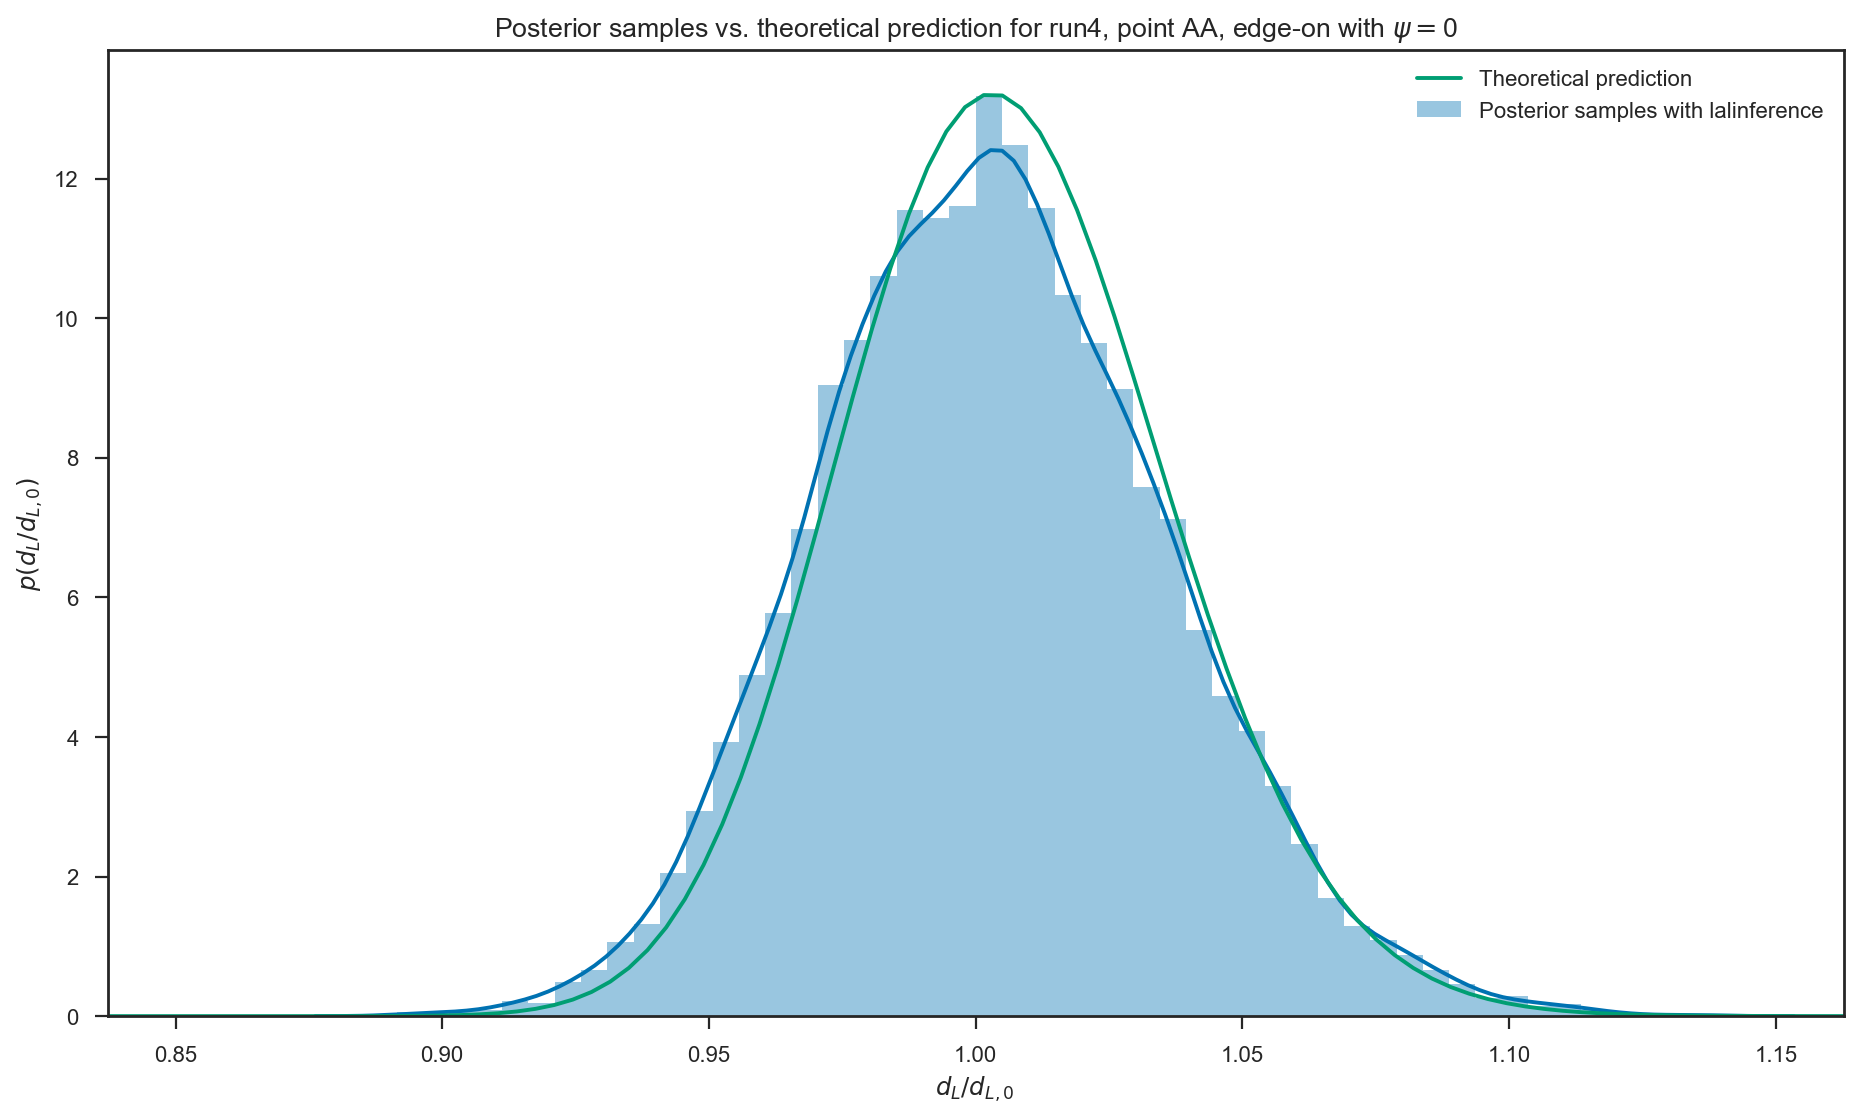

In [114]:
plot_run4(0)

## Run 3, Point AA, AB, AC

In [146]:
def plot_run3(i,name_point):
    #i = 1
    v_values = [1,0.868013565489, 0.503451585685, 0.00399019943792, -0.496540443482, -0.864023411834]
    v = v_values[i]
    #name_point = 'AB'

    #load the theoretical curves
    name_string_th = 'Theoretical_Distance_Posterior_{0}_run3/distance_v_{1}_psi_1.1641986_corr_{0}_run3.txt'.format(name_point, v)
    posterior_distance_th = genfromtxt(name_string_th)

    #load the posterior samples, generated with lalinference
    name_string_lal = 'posterior_samples_{0}/posterior_samples_{1}.dat'.format(name_point, i)
    postskyfixed = genfromtxt(name_string_lal, names=True)
    #print( postskyfixed.dtype)

    '''
    for i in range(6):
        v_values = [1,0.868013565489, 0.503451585685, 0.00399019943792, -0.496540443482, -0.864023411834]
        v = v_values[i]
        name_point = 'AB'

        #load the theoretical curves
        name_string_th = 'Theoretical_Distance_Posterior_{0}_run3/distance_v_{1}_psi_1.1641986_corr_{0}_run3.txt'.format(name_point, v)
        posterior_distance_th = genfromtxt(name_string_th)

        #load the posterior samples, generated with lalinference
        name_string_lal = 'posterior_samples_{0}/posterior_samples_{1}.dat'.format(name_point, i)
        postskyfixed = genfromtxt(name_string_lal, names=True)
        print('{1:.3g}'.format(v, 100/median(postskyfixed['dist'])*std(postskyfixed['dist'])))

    sns.distplot(postskyfixed['dist'])
    xlabel(r'$d_L$ ($\mathrm{Mpc}$)')
    ylabel(r'$p\left( d_L \right)$ ($\mathrm{Mpc}^{-1}$)')
    legend(loc='best')
    print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['dist']),dist_std))
    plt.show()'''

    dist_std = std(postskyfixed['dist'])
    y, x, _ = plt.hist(postskyfixed['dist'], bins = 50, label = 'dist')
    plt.show()
    #plt.plot(x[1:],y/x[1:]**2)
    #plt.show()


    mu = x[numpy.argmax(y/x[1:]**2)]
    print ('maximal distance (with prior) = {}'.format(x[numpy.argmax(y)]))
    print ('maximal likelihood distance = {}'.format(mu))

    #Here set mu to the maximum WITH prior
    #mu = x[numpy.argmax(y)]


    plt.plot(posterior_distance_th[:,0], posterior_distance_th[:,1], label = 'Theoretical prediction')
    sns.distplot(postskyfixed['dist']/mu, label = 'Posterior samples with lalinference')
    plt.title(r'Posterior samples vs. theoretical prediction for run3, point {0}, v = {1:.3g}'.format(name_point,v))
    plt.xlim(1-5*dist_std/mu,1+5*dist_std/mu)
    xlabel(r'$d_L/d_{L,0}$ ')
    ylabel(r'$p\left( d_L/d_{L,0} \right)$ ')
    legend(loc='best')
    plt.savefig('Figures/run3_{0}/'.format(name_point)+'distance_v_{0}_psi_1.16.png'.format(v), dpi = 200)
    print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['dist']),std(postskyfixed['dist'])))

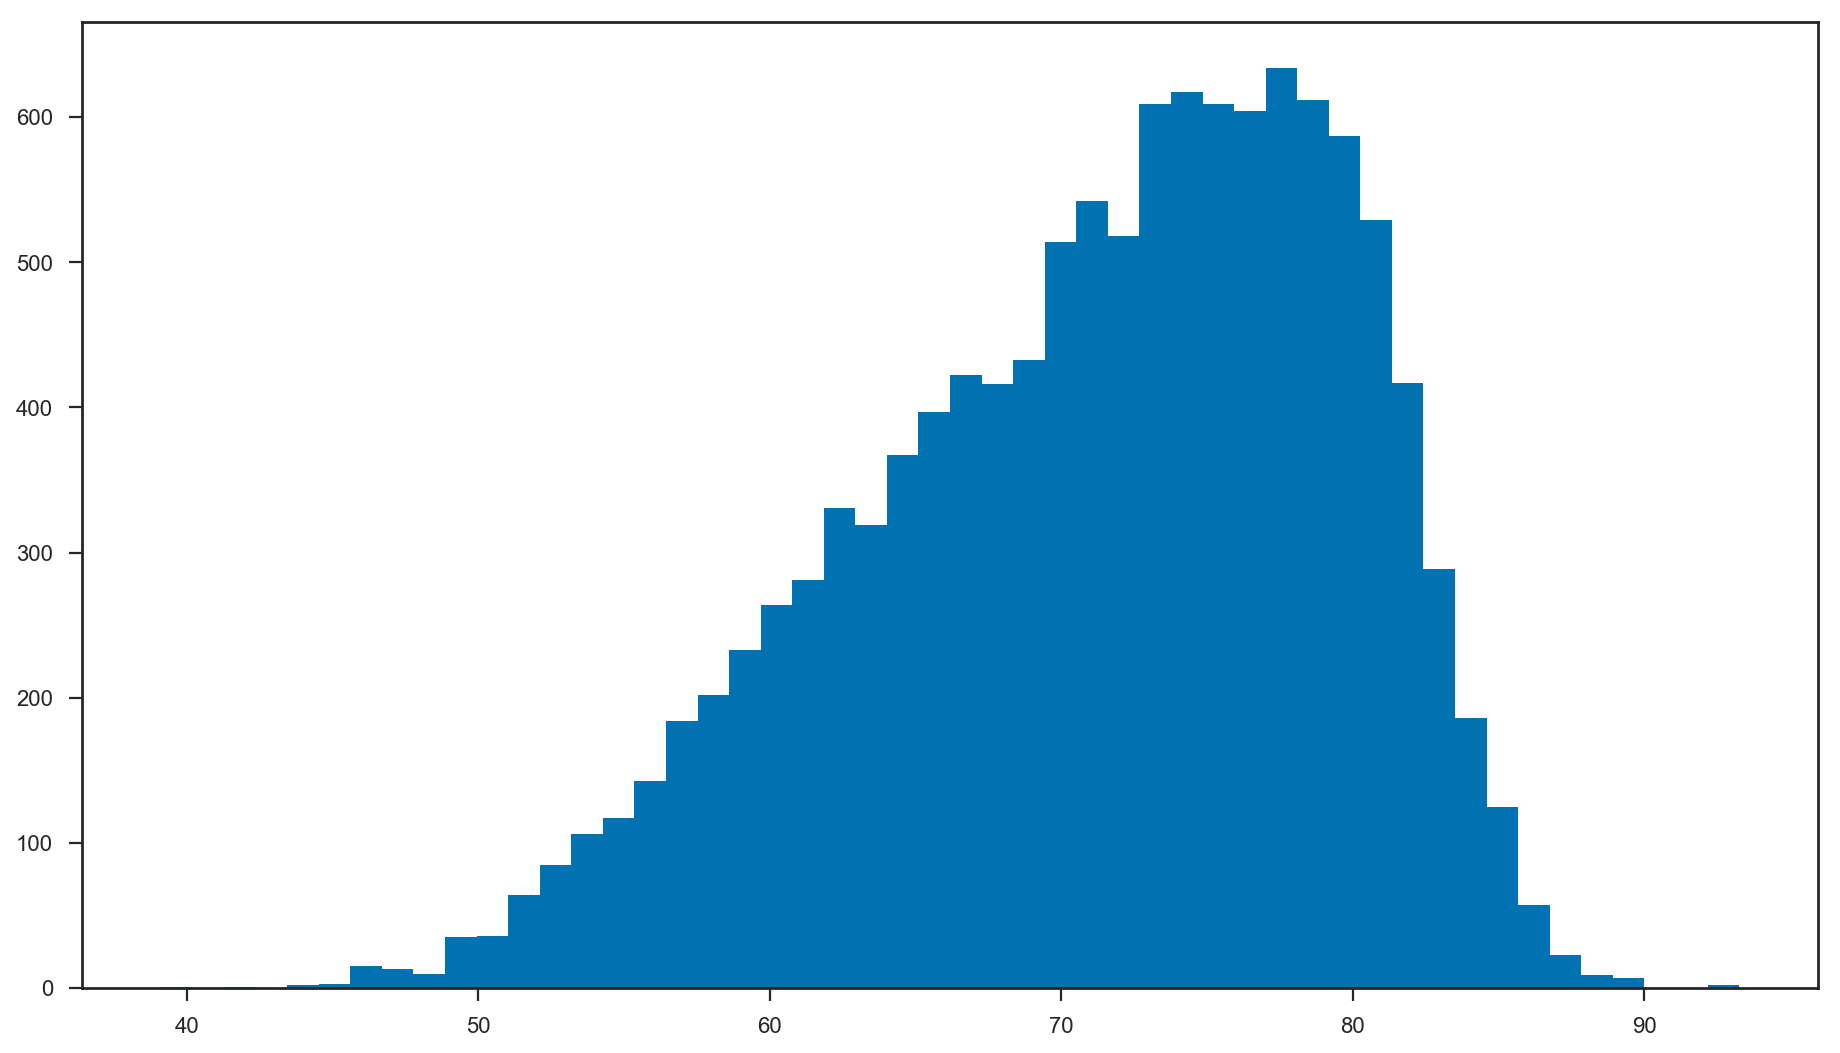

maximal distance (with prior) = 77.01544408413815
maximal likelihood distance = 72.6831731464529
<d> +/- sigma_d = 71.31 +/- 8.3 Mpc


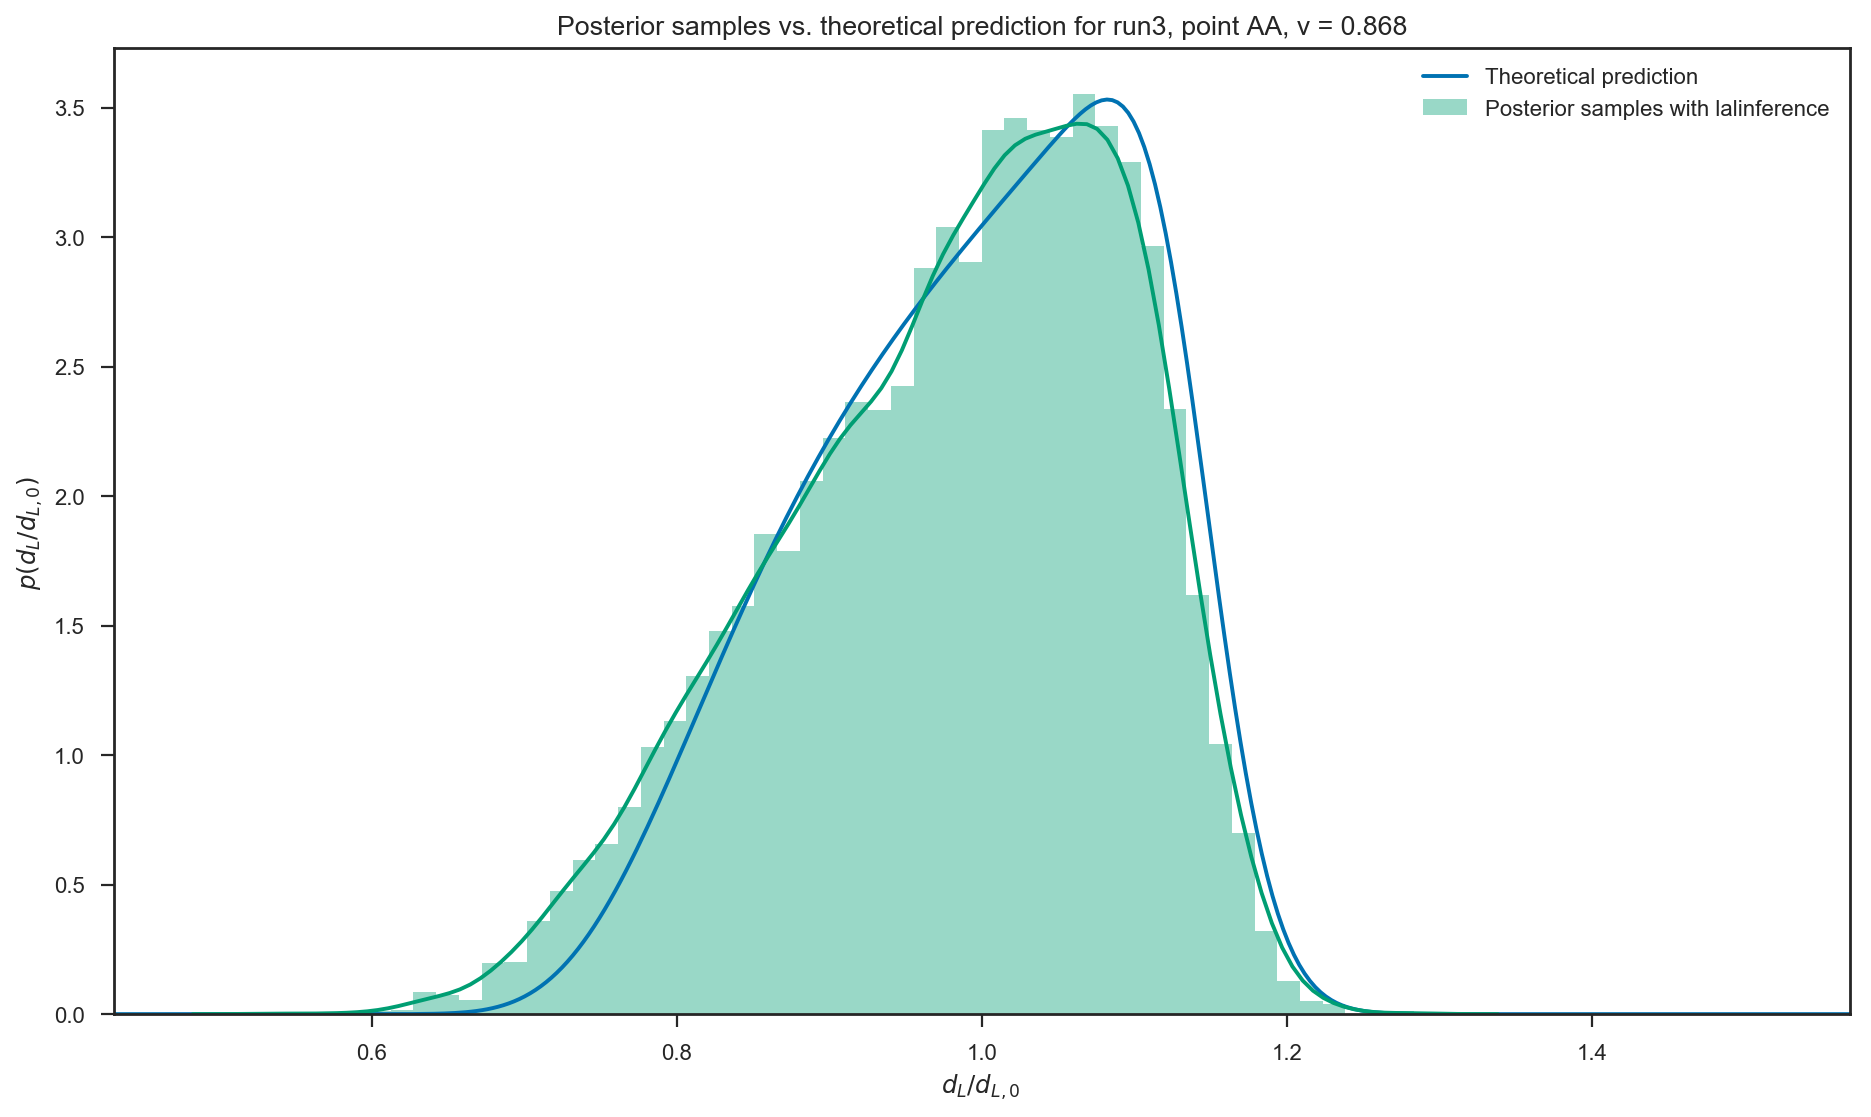

maximal distance (with prior) = 36.43597223903093
maximal likelihood distance = 36.43597223903093
<d> +/- sigma_d = 37.96 +/- 3 Mpc


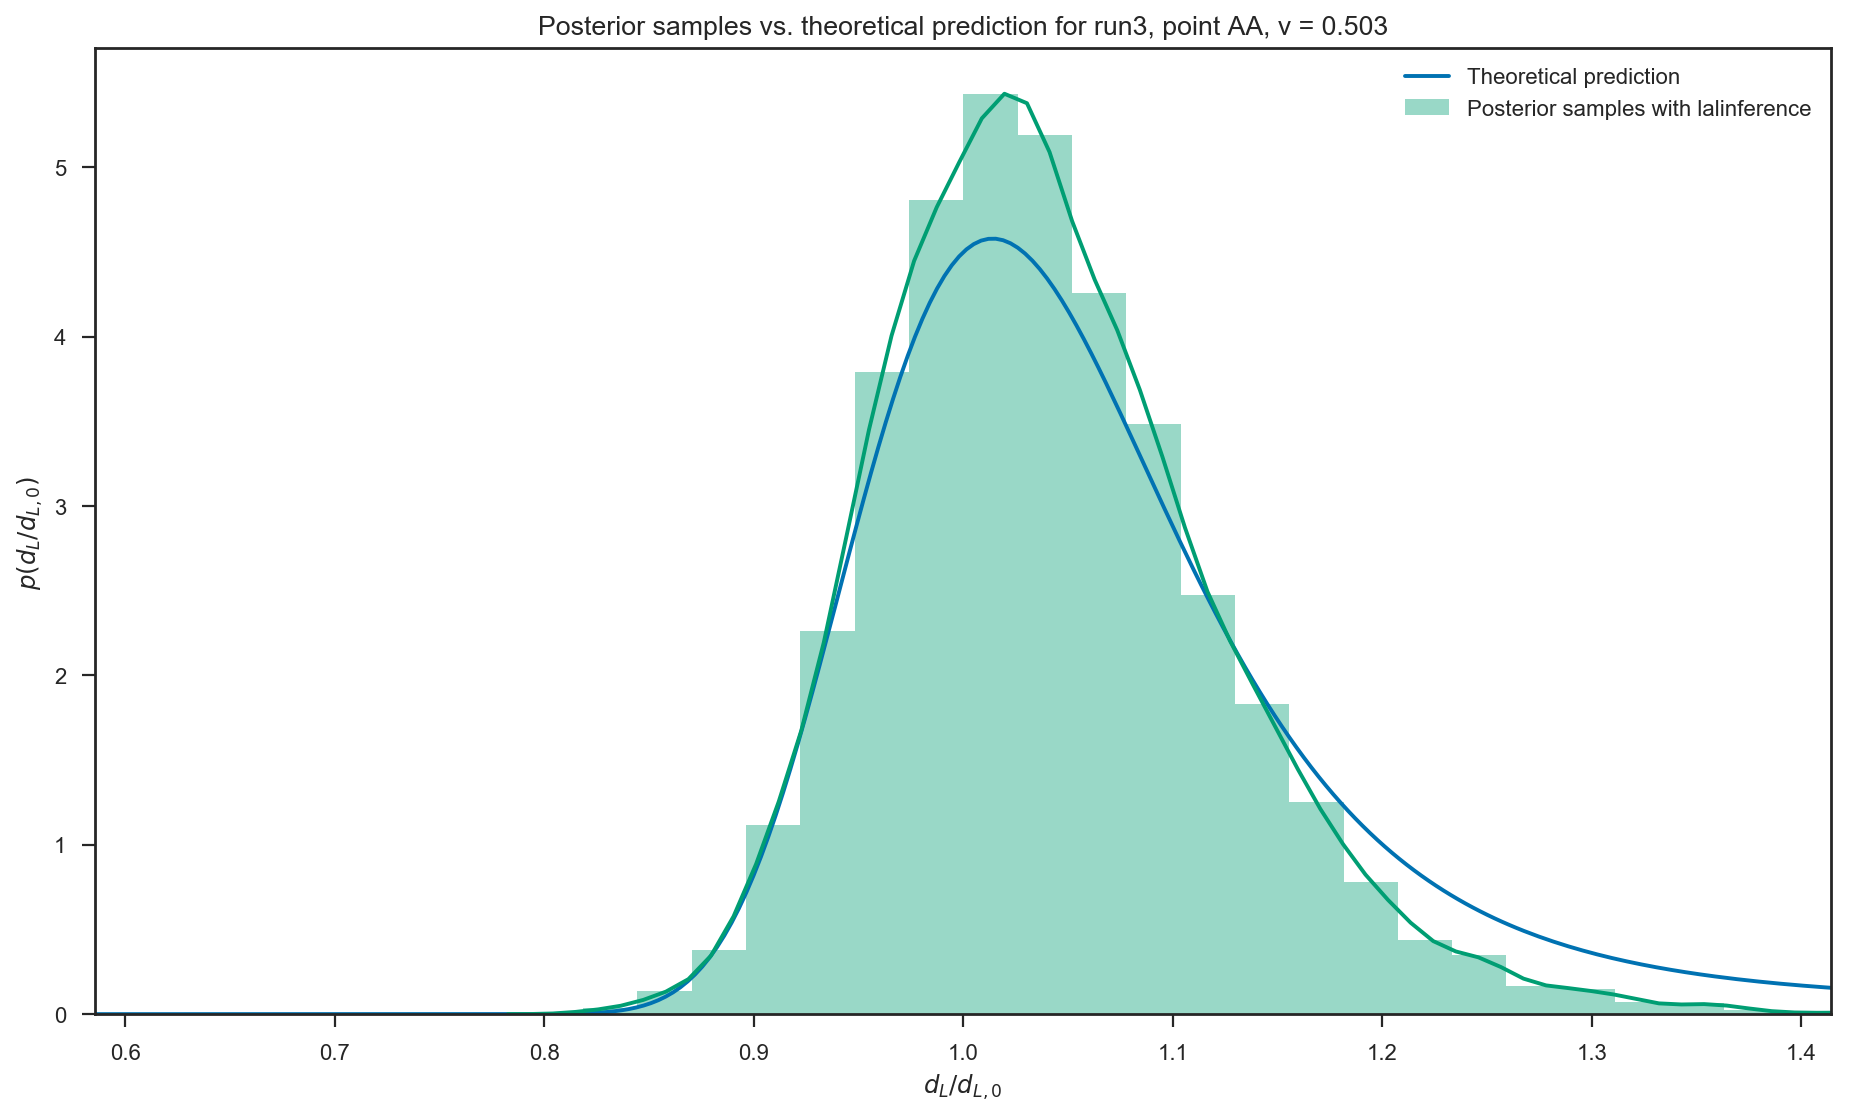

maximal distance (with prior) = 20.91861405921651
maximal likelihood distance = 20.91861405921651
<d> +/- sigma_d = 21.03 +/- 0.67 Mpc


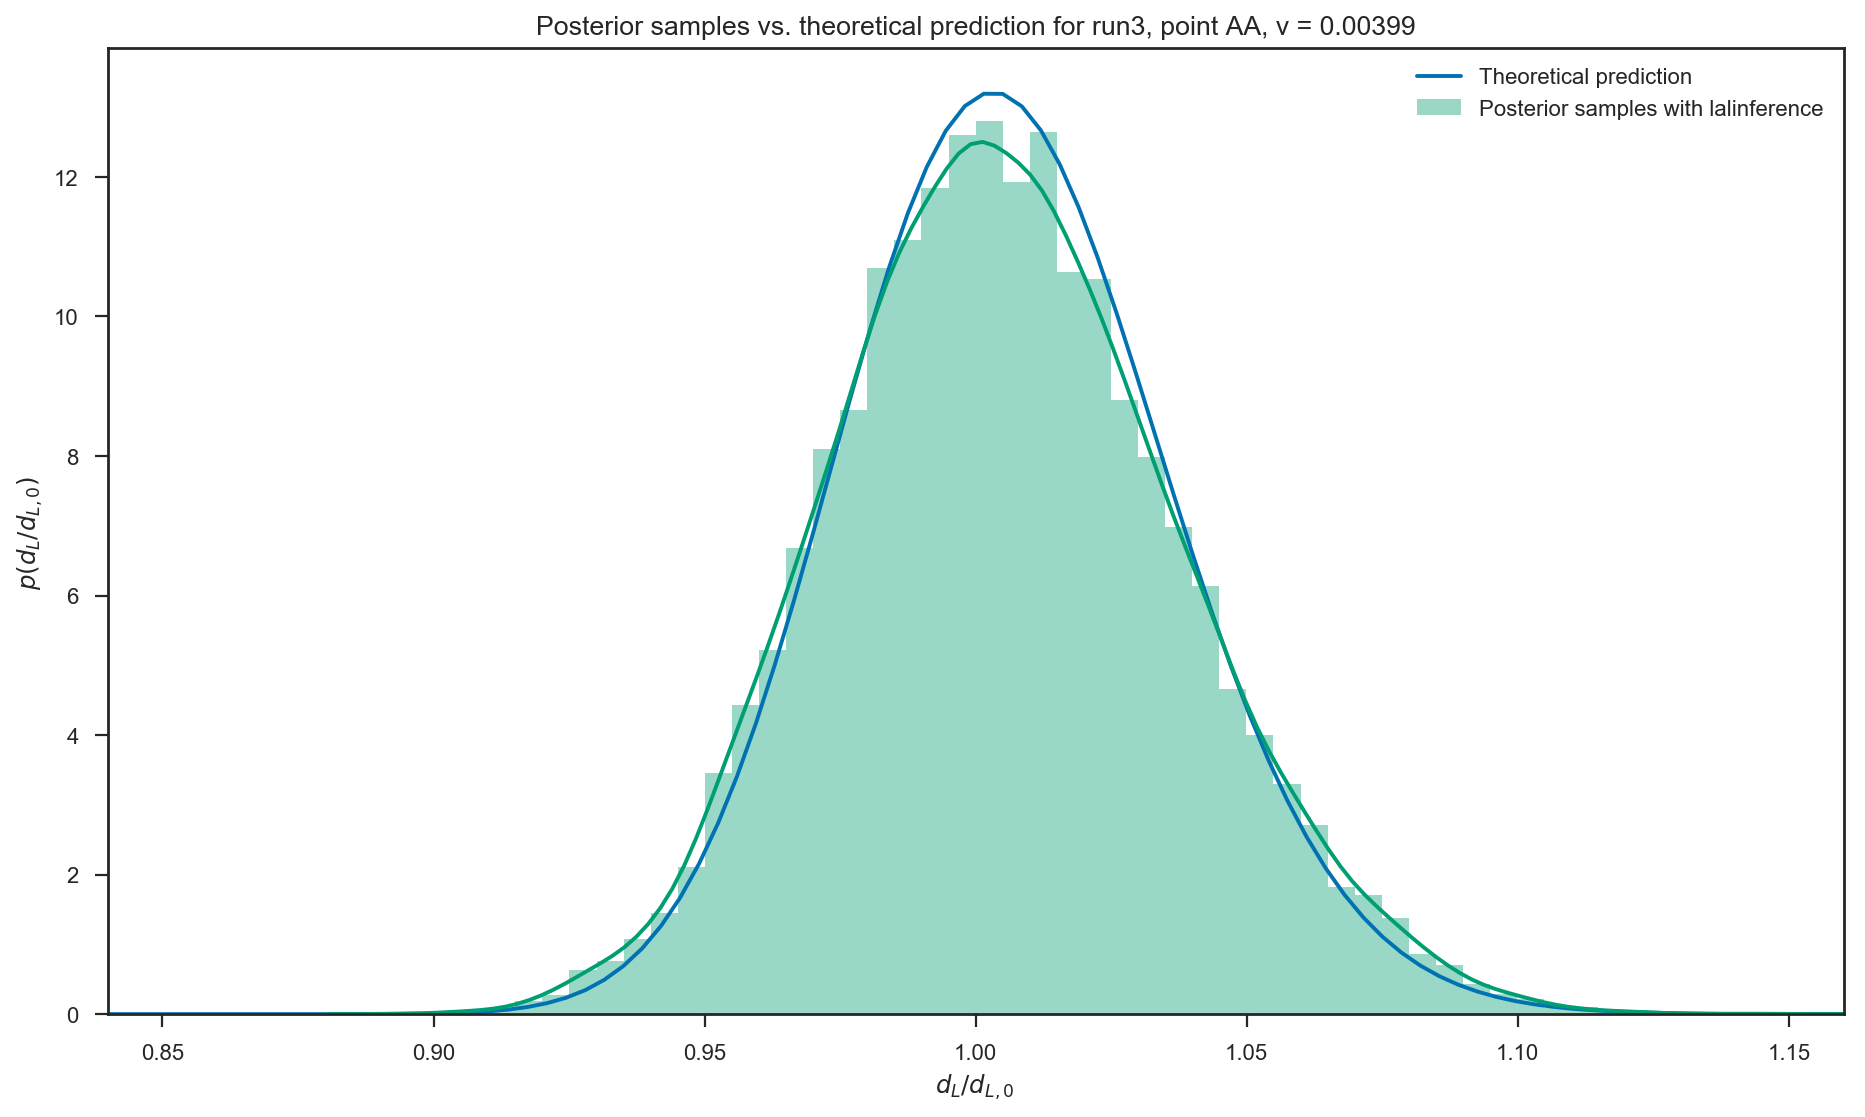

maximal distance (with prior) = 39.689911635465975
maximal likelihood distance = 38.74809368940505
<d> +/- sigma_d = 41.32 +/- 4.2 Mpc


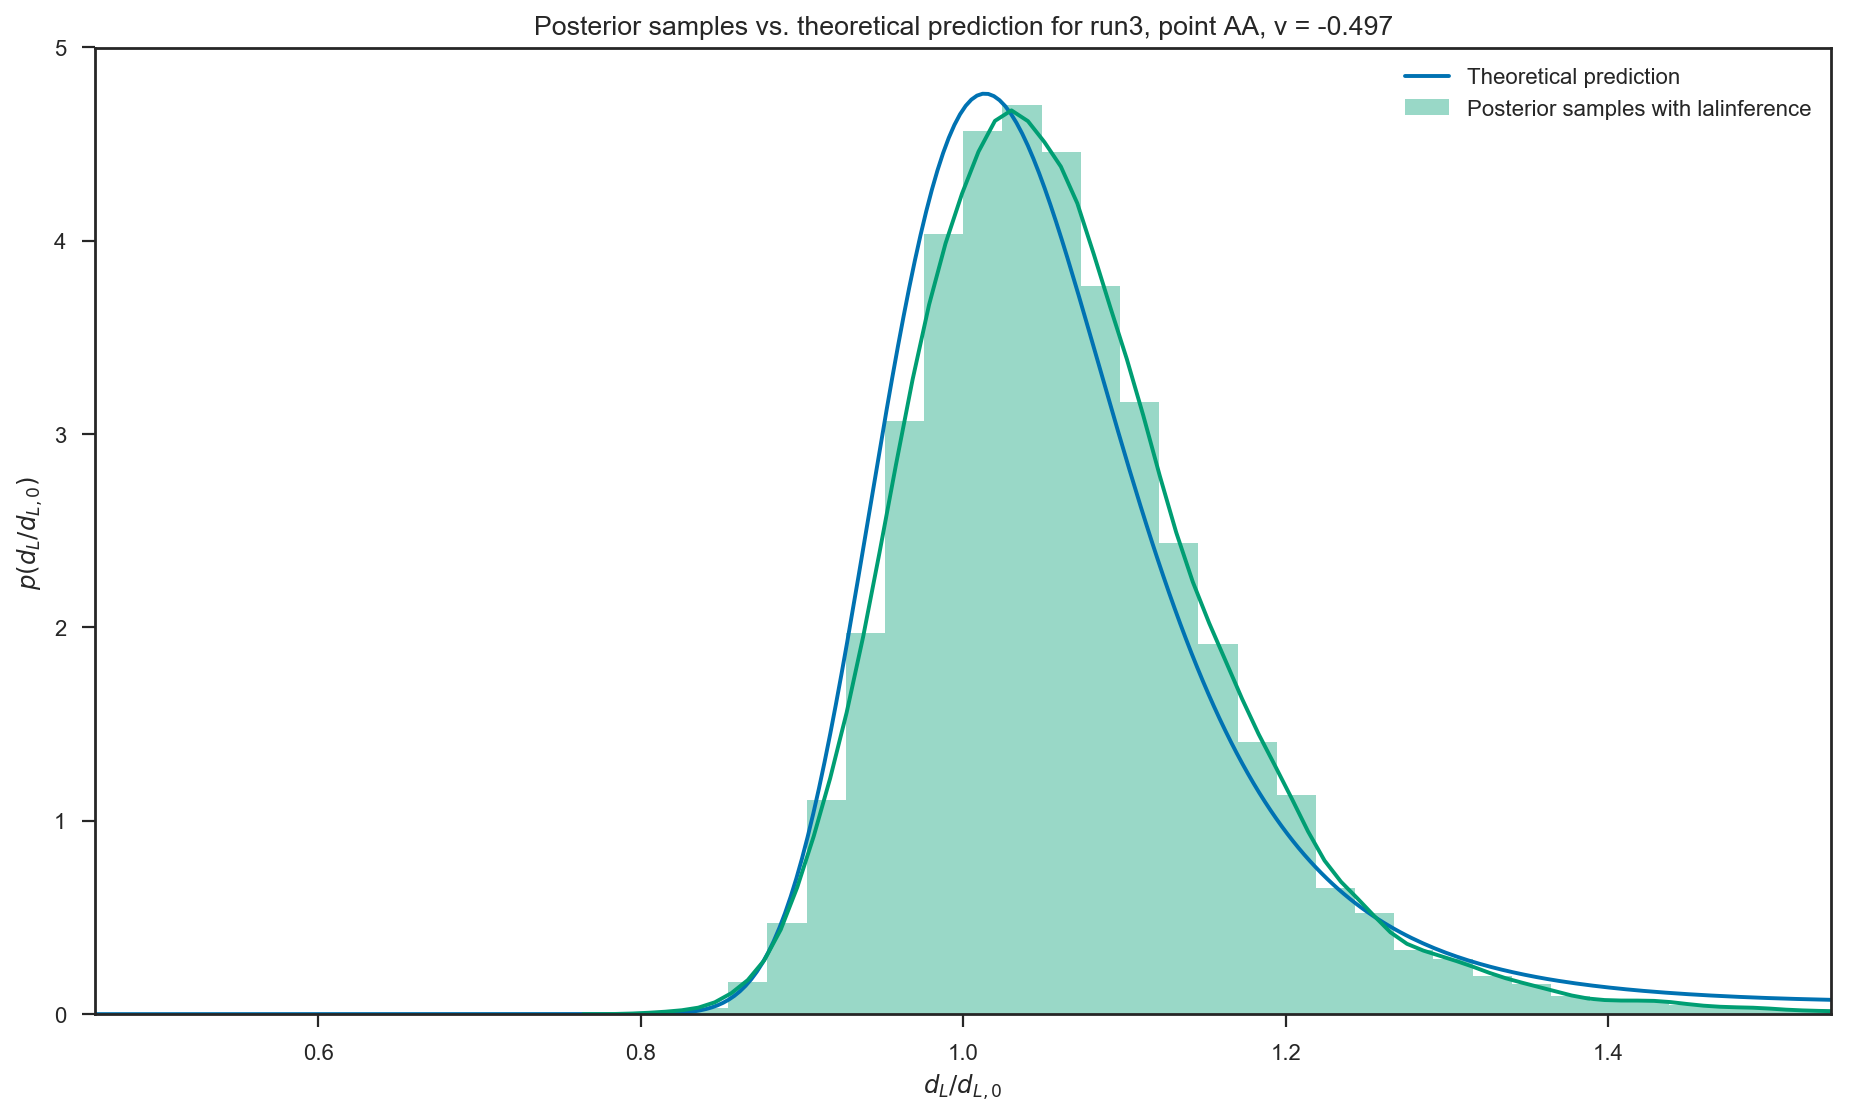

maximal distance (with prior) = 76.69468525418893
maximal likelihood distance = 76.69468525418893
<d> +/- sigma_d = 71.1 +/- 8.2 Mpc


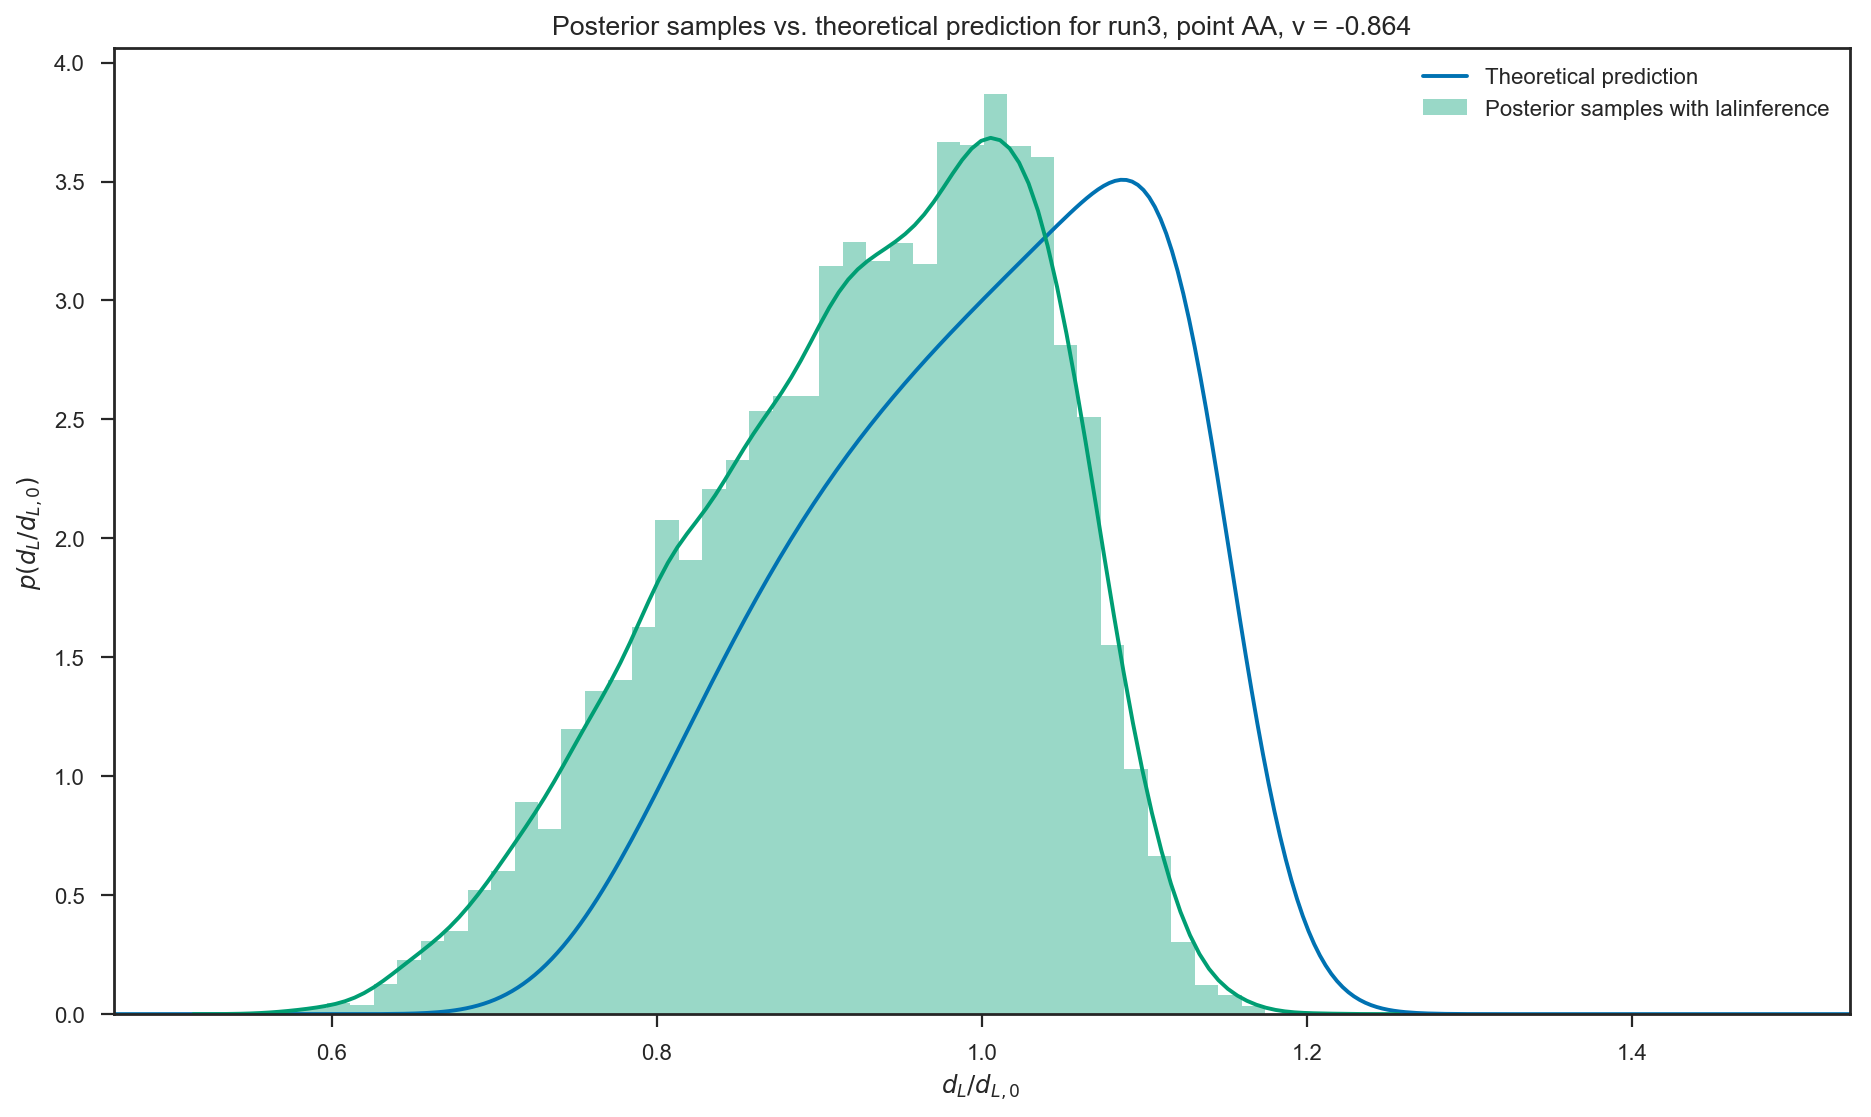

In [149]:
for i in np.arange(1,6,1):
    plot_run3(i,'AB')

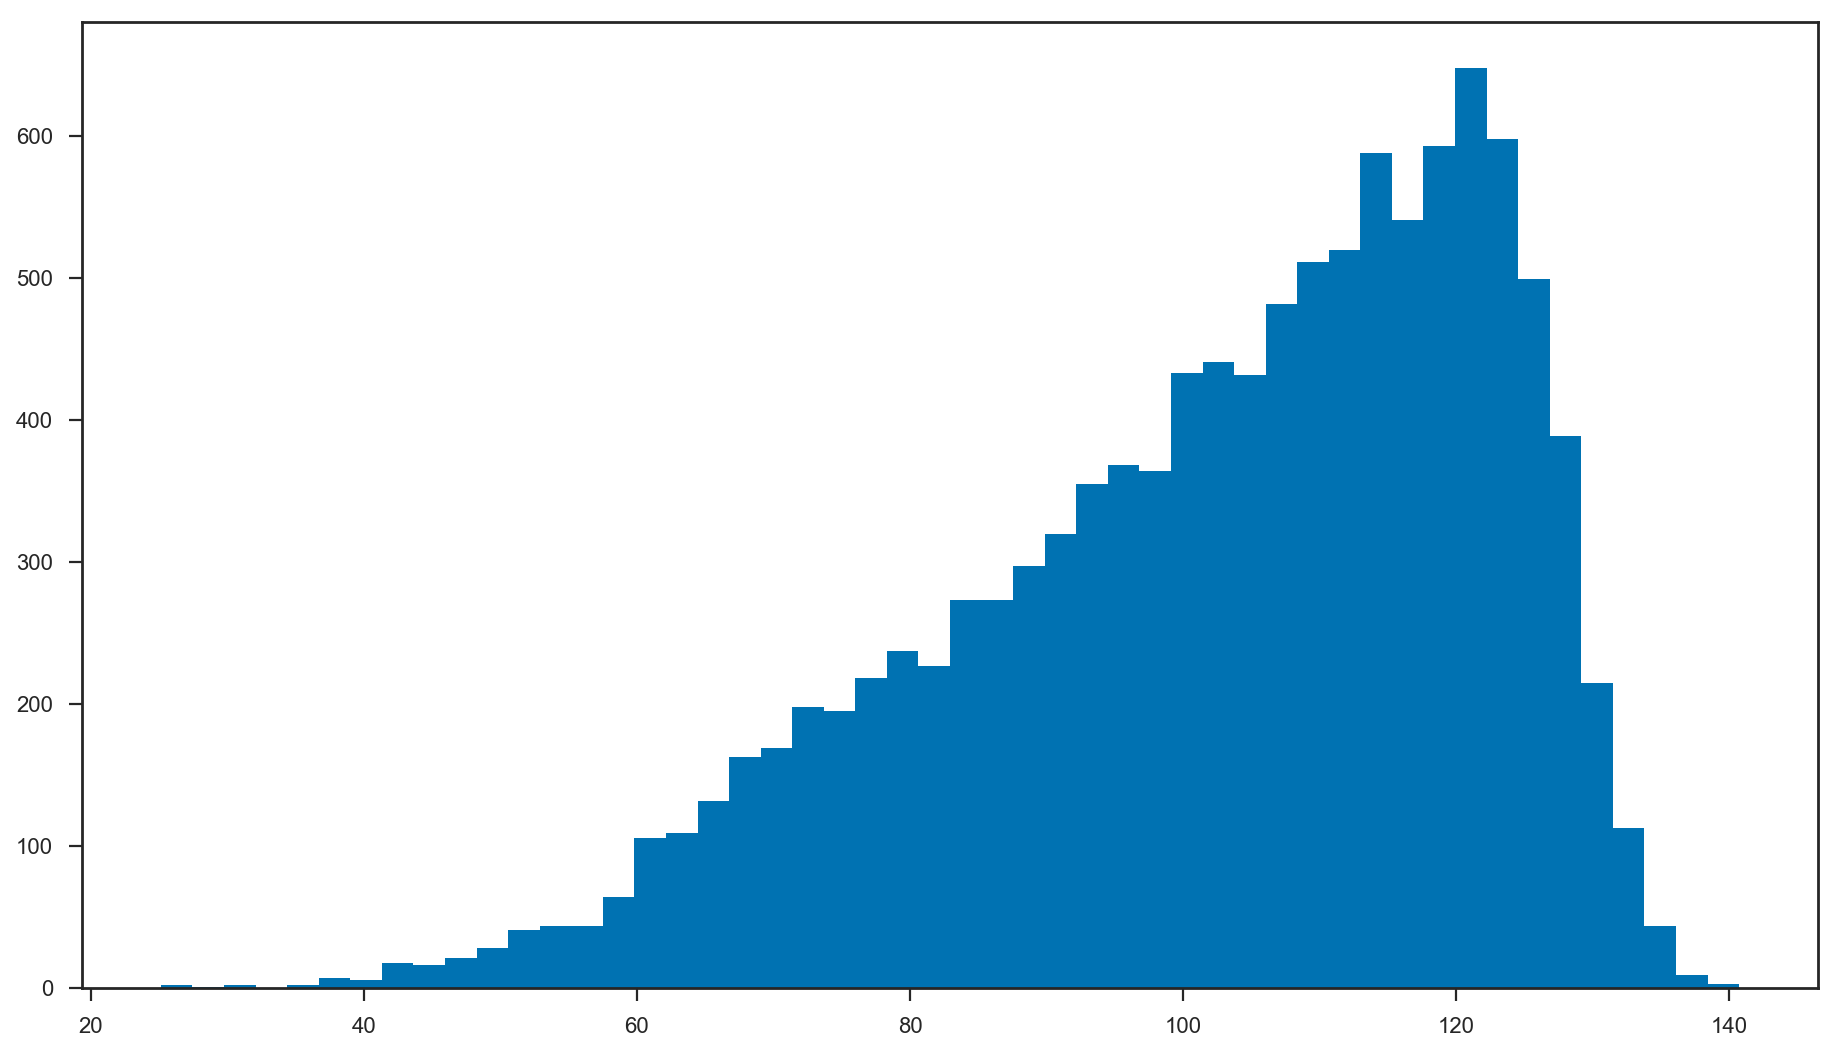

maximal distance (with prior) = 119.91814912938383
maximal likelihood distance = 112.98290643022719
<d> +/- sigma_d = 102.6 +/- 20 Mpc


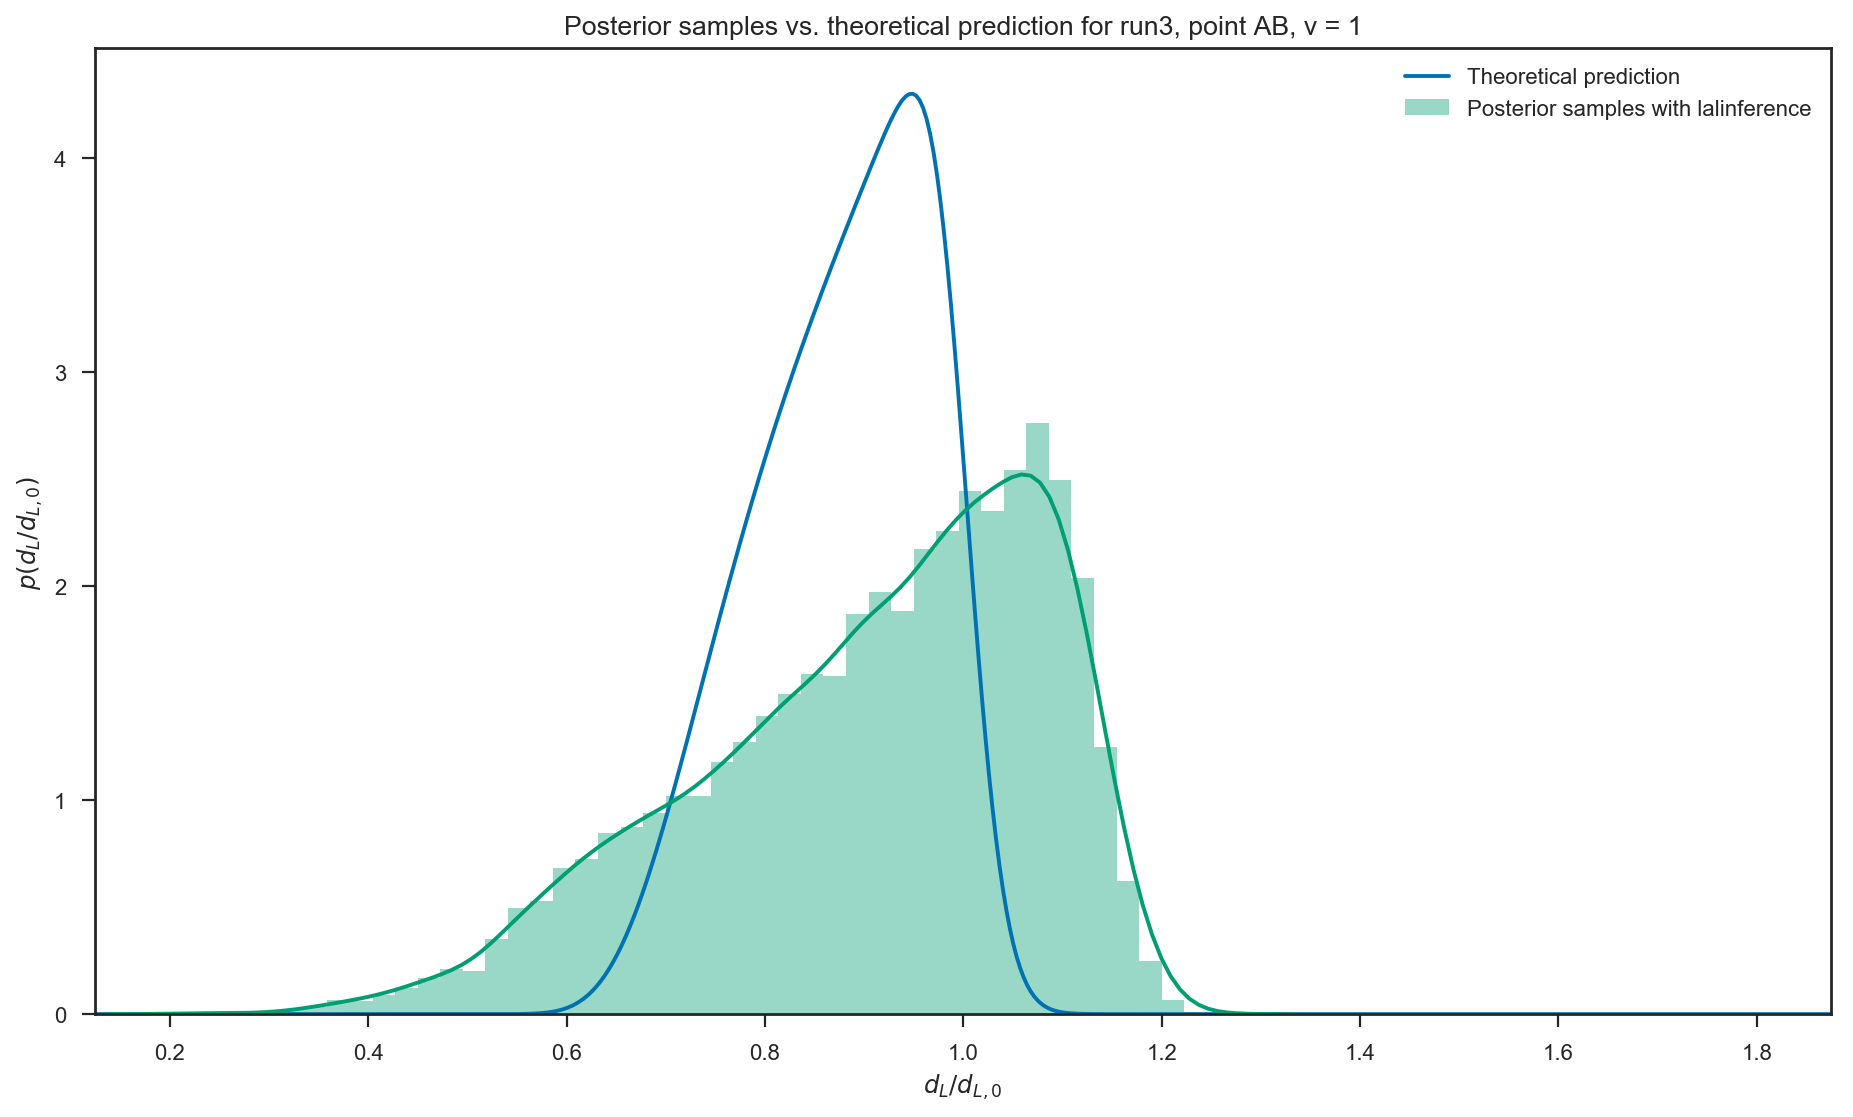

In [150]:
i = 0
plot_run3(i,'AB')

In the following, psi of the theoretical prediction will be chosen by hand: a posterior. 

<d> +/- sigma_d = 102.6 +/- 20 Mpc


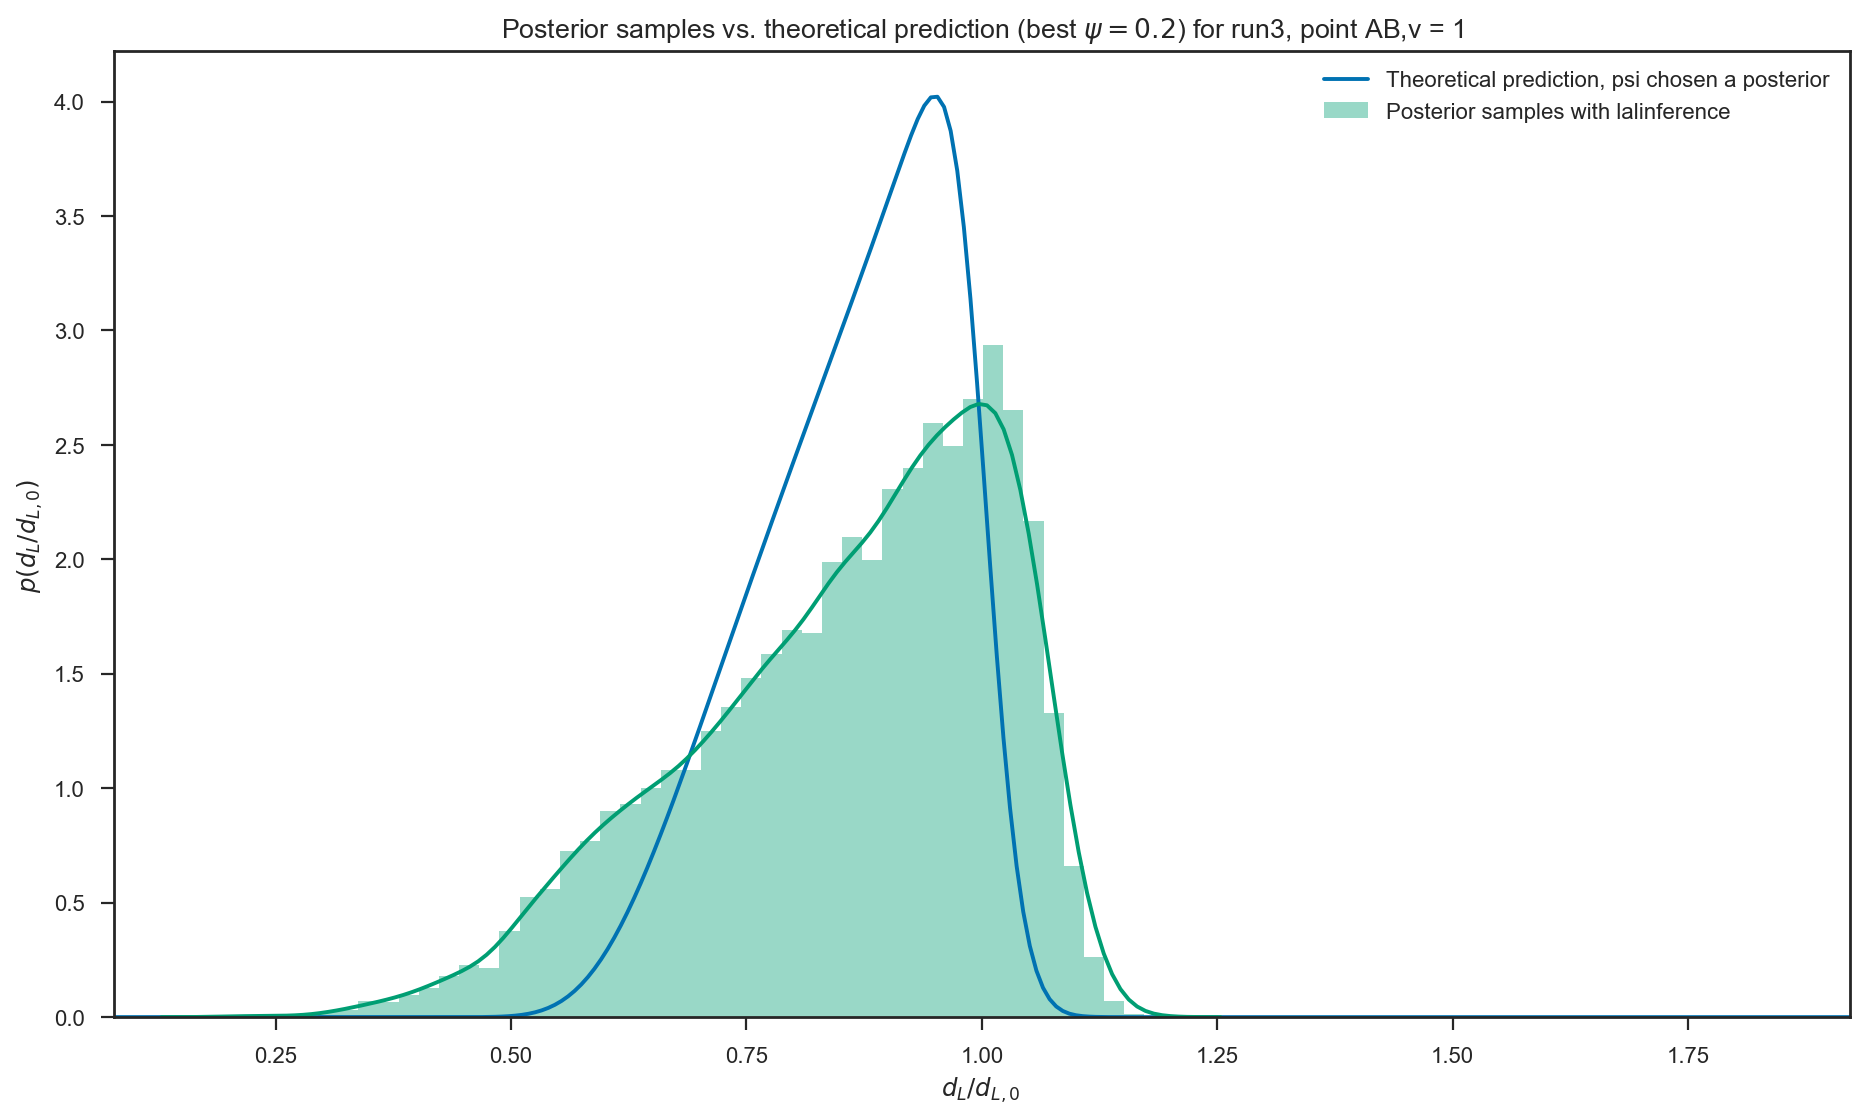

In [136]:
#load the theoretical curves, for now only for AB 0 to 2
i = 2

v_values = [1,0.868013565489, 0.503451585685, 0.00399019943792, -0.496540443482, -0.864023411834]
v = v_values[i]
name_string_th = 'Theoretical_Distance_Posterior_{0}_run3_best_psi/distance_v_{1}_best_psi_corr_{0}_run3.txt'.format(name_point, v)
posterior_distance_th_best_psi =  genfromtxt(name_string_th)

name_string_lal = 'posterior_samples_{0}/posterior_samples_{1}.dat'.format(name_point, i)
postskyfixed = genfromtxt(name_string_lal, names=True)

best_psi = [0.2,0.79,0.075]
best_mu = [113,64,67]

plt.plot(posterior_distance_th_best_psi[:,0], posterior_distance_th_best_psi[:,1], label = 'Theoretical prediction, psi chosen a posterior')
sns.distplot(postskyfixed['dist']/best_mu[i], label = 'Posterior samples with lalinference')
plt.title(r'Posterior samples vs. theoretical prediction (best $\psi = {2}$) for run3, point {0},v = {1:.3g}'.format(name_point,v,best_psi[i]))

plt.xlim(1-5*dist_std/best_mu[i],1+5*dist_std/best_mu[i])
xlabel(r'$d_L/d_{L,0}$ ')
ylabel(r'$p\left( d_L/d_{L,0} \right)$ ')
legend(loc='best')
plt.savefig('Figures/run3_{0}/'.format(name_point)+'distance_v_{0}_best_psi.png'.format(v), dpi = 200)
print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['dist']),std(postskyfixed['dist'])))